### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset into dataframe

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

### Exploratory Data Analysis

In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### Label Encoding 

In [24]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


### Visualising Dataset

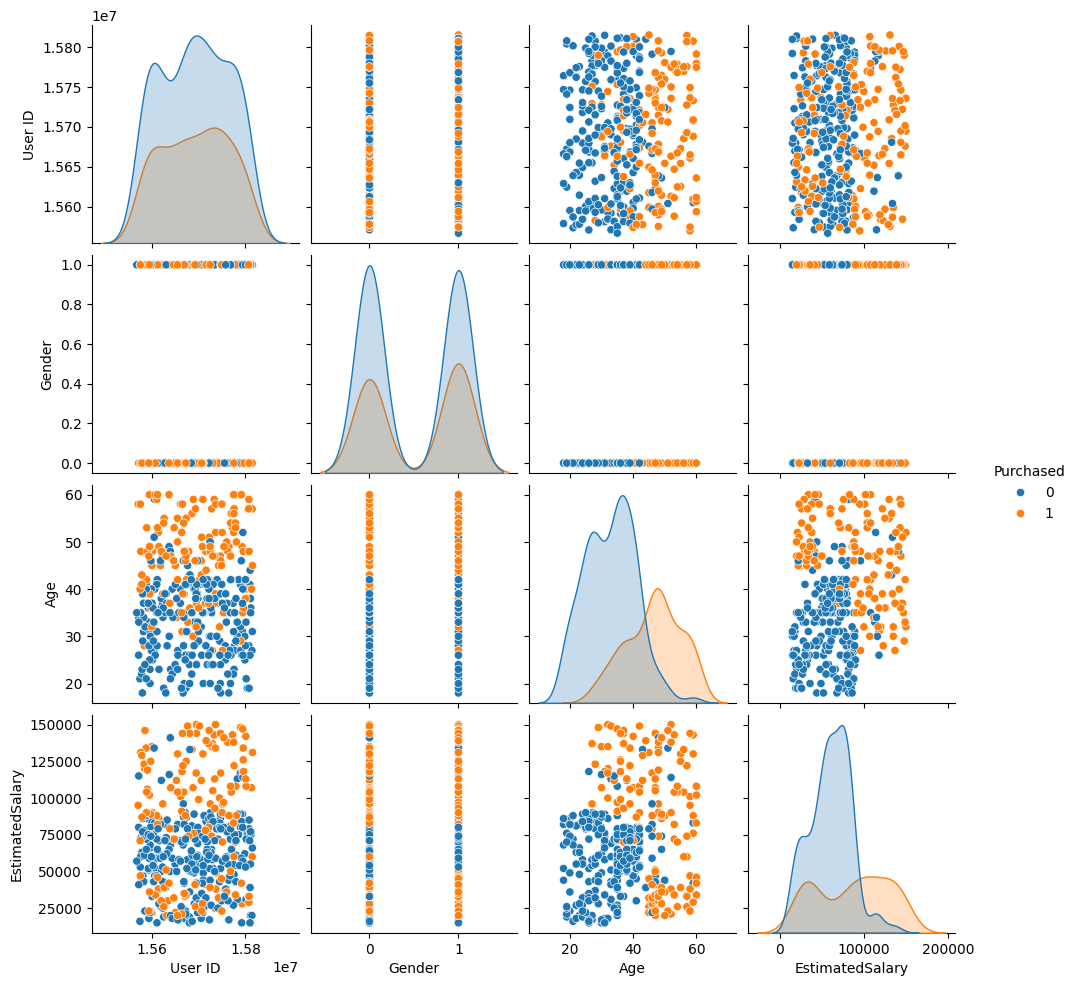

In [39]:
sns.pairplot(df, hue='Purchased')
plt.show()

### Separating input and target data

In [27]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

### Splitting dataset into train, test, split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Scaling dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Training Model

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [31]:
clf.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [52]:
y_pred = clf.predict(x_test)

### Accuracy of classifier

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.925


### Confusion Matrix

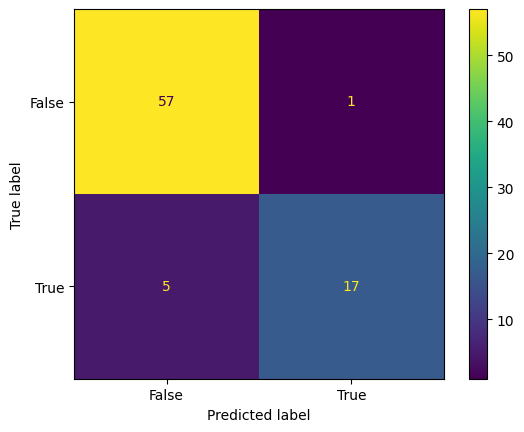

In [49]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Calculate precision, recall, F1-score and Error-rate

In [56]:
TN, FP, FN, TP = confusion_matrix.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
error_rate = (FP + FN) / (TP + TN + FP + FN)

print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print('\n')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Error Rate: {error_rate}")

True Positives: 17
True Negatives: 57
False Positives: 1
False Negatives: 5


Precision: 0.9444444444444444
Recall: 0.7727272727272727
F1 Score: 0.85
Error Rate: 0.075


### ROC Curve

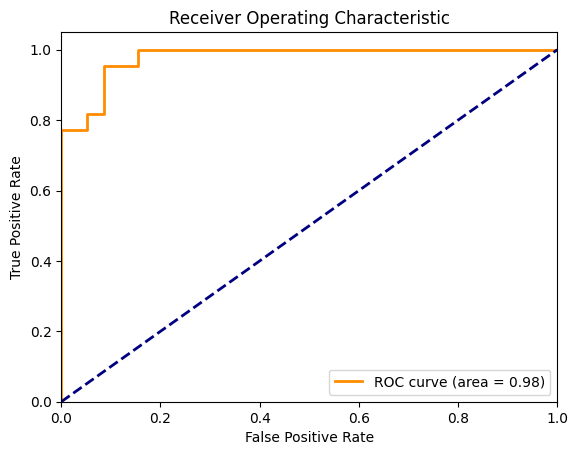

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = clf.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Conclusion
<ol>
    <li>TP : 17</li>
    <li>FP : 1</li>
    <li>TN : 57</li>
    <li>FN : 5</li>
    <li>Accuracy : 0.925</li>
    <li>Precision : 0.944</li>
    <li>Error-rate : 0.075</li>
    <li>Recall : 0.772</li>
    <li>F1-Score : 0.85</li>
</ol>